## Homework 2 CME306
### Problem 4.4

In [26]:
import numpy as np
import matplotlib.pyplot as plt

The discretization scheme for the finite difference method for the resolution of $-u''+u=2x$ on $\Omega=(0,1)$ with $u(0)=u(1)=0$ is described on the handwritten notes

In [22]:
def solve(M):
    """
    Solves the two-point boundary value problem with the finite difference method and h = 1 / M
    """
    
    h = 1 / M
    
    # Defining A
    A = (2 + h ** 2) * np.eye(M - 1)
    for i in range(M - 2):
        A[i, i + 1], A[i + 1, i] = -1, -1
    
    # Defining b
    b = 2 * h ** 3 * np.arange(1, M)
    
    # Actually solving
    U = np.linalg.inv(A) @ b
    
    # Adding 0 at the beginning and at the end
    U = np.concatenate(([0], U, [0]))
    
    return U

In [23]:
# Real solution
solution = lambda x: (-2) / (np.exp(1) - np.exp(-1)) * (np.exp(x) - np.exp(-x)) + 2 * x
x = np.linspace(0, 1, 100)
y = solution(x)

In [24]:
# Finite difference
U1 = solve(10)
U2 = solve(20)

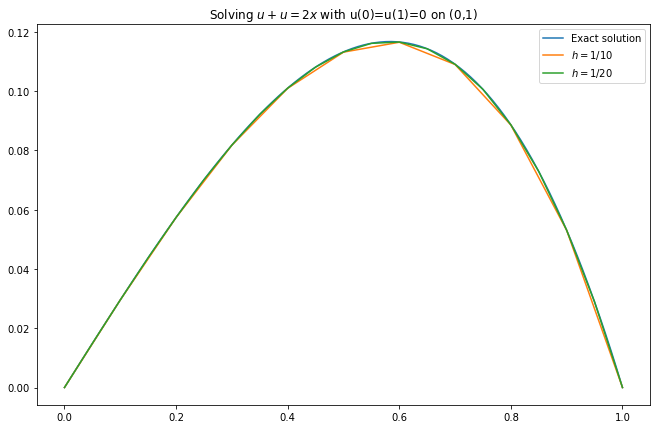

In [27]:
# Plots
plt.figure(figsize=(11, 7))
plt.plot(x, y, label='Exact solution')
plt.plot(np.arange(11) / 10, U1, label=r'$h=1/10$')
plt.plot(np.arange(21) / 20, U2, label=r'$h=1/20$')
plt.legend(loc='best')
plt.title(r'Solving $u''+u=2x$ with u(0)=u(1)=0 on (0,1)')
plt.show()

In [28]:
def max_error(U, M):
    """
    Takes as input the finite difference solution U with h = 1 / M and returns the max error at the mesh points
    """
    
    # Computing the exact solution at the mesh points
    exact = solution(np.arange(M + 1) / M)
    
    # Computing the max error
    max_error = np.max(np.abs(U - exact))
    
    return max_error

In [29]:
max_error(U1, 10)

8.829182930167323e-05

In [30]:
max_error(U2, 20)

2.2093782296450648e-05